In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [65]:
df=pd.read_csv("Mall_Customers.csv")

In [66]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [68]:
df.shape

(200, 5)

In [69]:
X=df.iloc[:,[3,4]].values

In [70]:
X.shape

(200, 2)

# find optimal number of clusters

In [52]:
from sklearn.cluster import KMeans

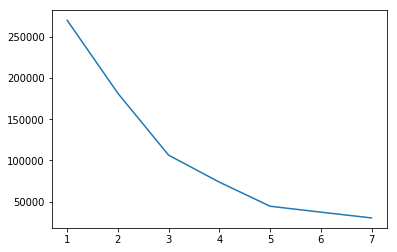

In [53]:
sse_=[]
for k in range(1,8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse_.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

In [54]:
from sklearn.metrics import silhouette_score

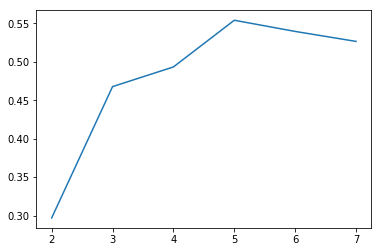

In [55]:
sse_=[]
for k in range(2,8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse_.append([k,silhouette_score(X,kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

# fitting kmeans to the data

In [56]:
kmeans=KMeans(n_clusters=5)
y_kmeans=kmeans.fit_predict(X)

# Visualizing the test results

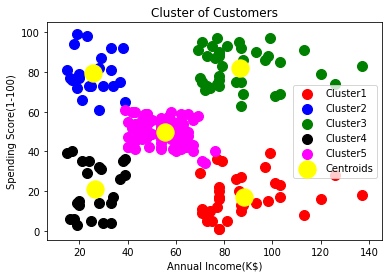

In [63]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="Cluster1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c="blue",label="Cluster2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="green",label="Cluster3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c="black",label="Cluster4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c="magenta",label="Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Centroids")

plt.title("Cluster of Customers")
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

